In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%% # Met station Timeseries
#Data loading

gulk_low = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_weather/gulkana/LVL2/gulkana1480_daily_LVL2.csv',
                       parse_dates=['Date'], index_col='Date')
gulk_low_old = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_weather/gulkana/LVL2/gulkana1480_predigital_weatherdata_daily.csv',
                           parse_dates=['Date'], index_col='Date')
wolv_low = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_weather/wolverine/LVL2/wolverine990_daily_LVL2.csv',
                       parse_dates=['Date'], index_col='Date')
wolv_low_old = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_weather/wolverine/LVL2/wolverine990_predigital_weatherdata_daily.csv',
                           parse_dates=['Date'], index_col='Date')

In [3]:
#%% Monthly avgs

Gnew_monthlyT = gulk_low.resample('M')
Gnew_monthlyT = Gnew_monthlyT.mean()

Gold_monthlyT = gulk_low_old.resample('M')
Gold_monthlyT= Gold_monthlyT.mean()

wolv_monthly = wolv_low.resample('M')
wolv_monthly = wolv_monthly.mean()

wolv_old_monthly = wolv_low_old.resample('M')
wolv_old_monthly= wolv_old_monthly.mean()

Text(0.5, 1.0, 'Wolverine Monthly Avg Cumulative Precip')

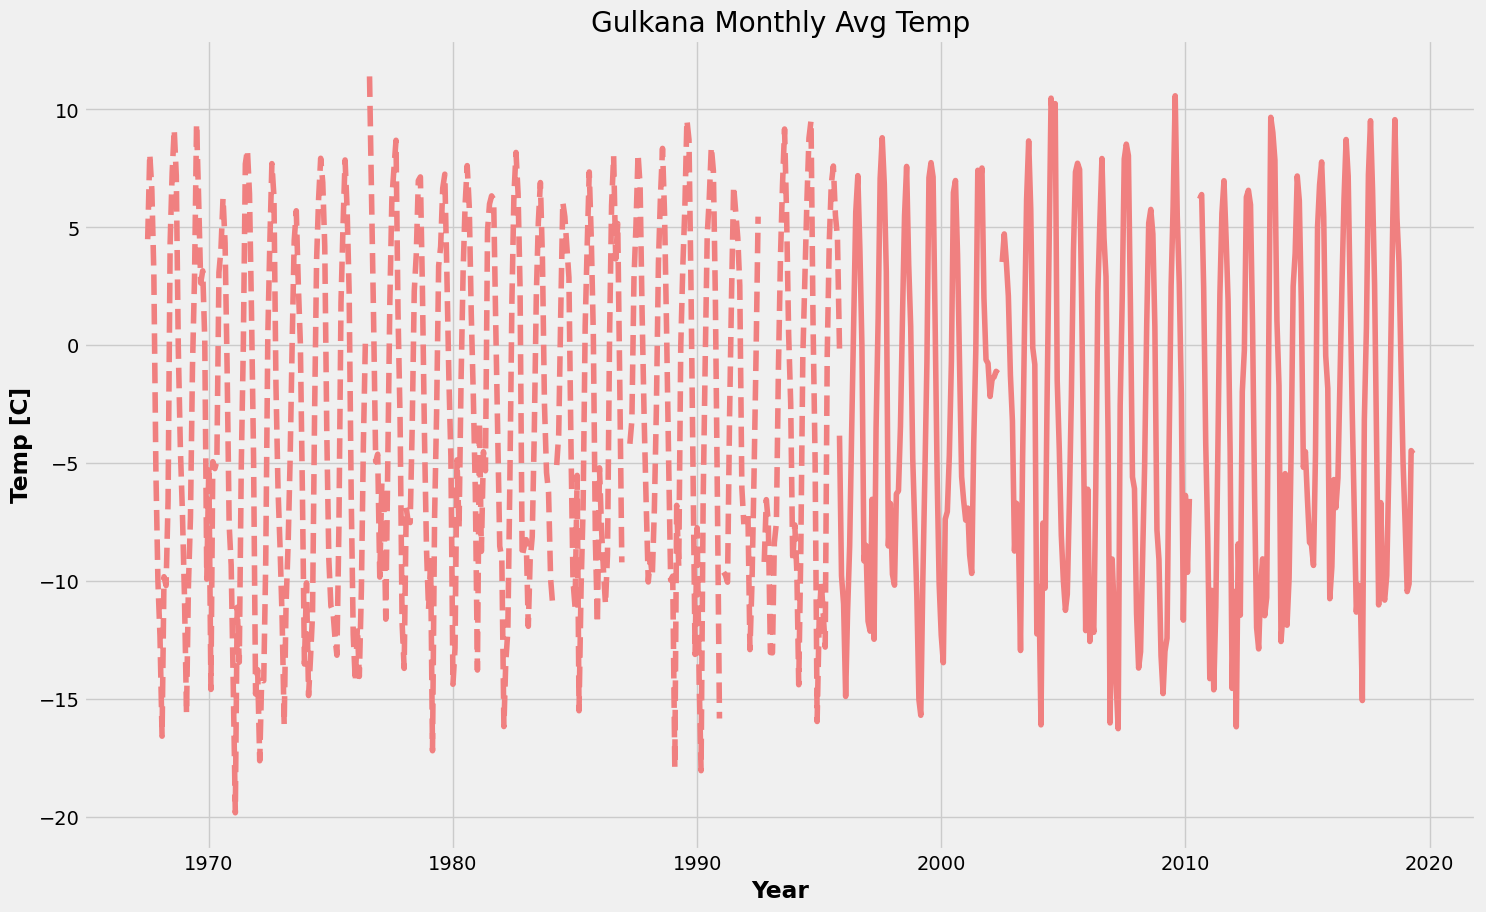

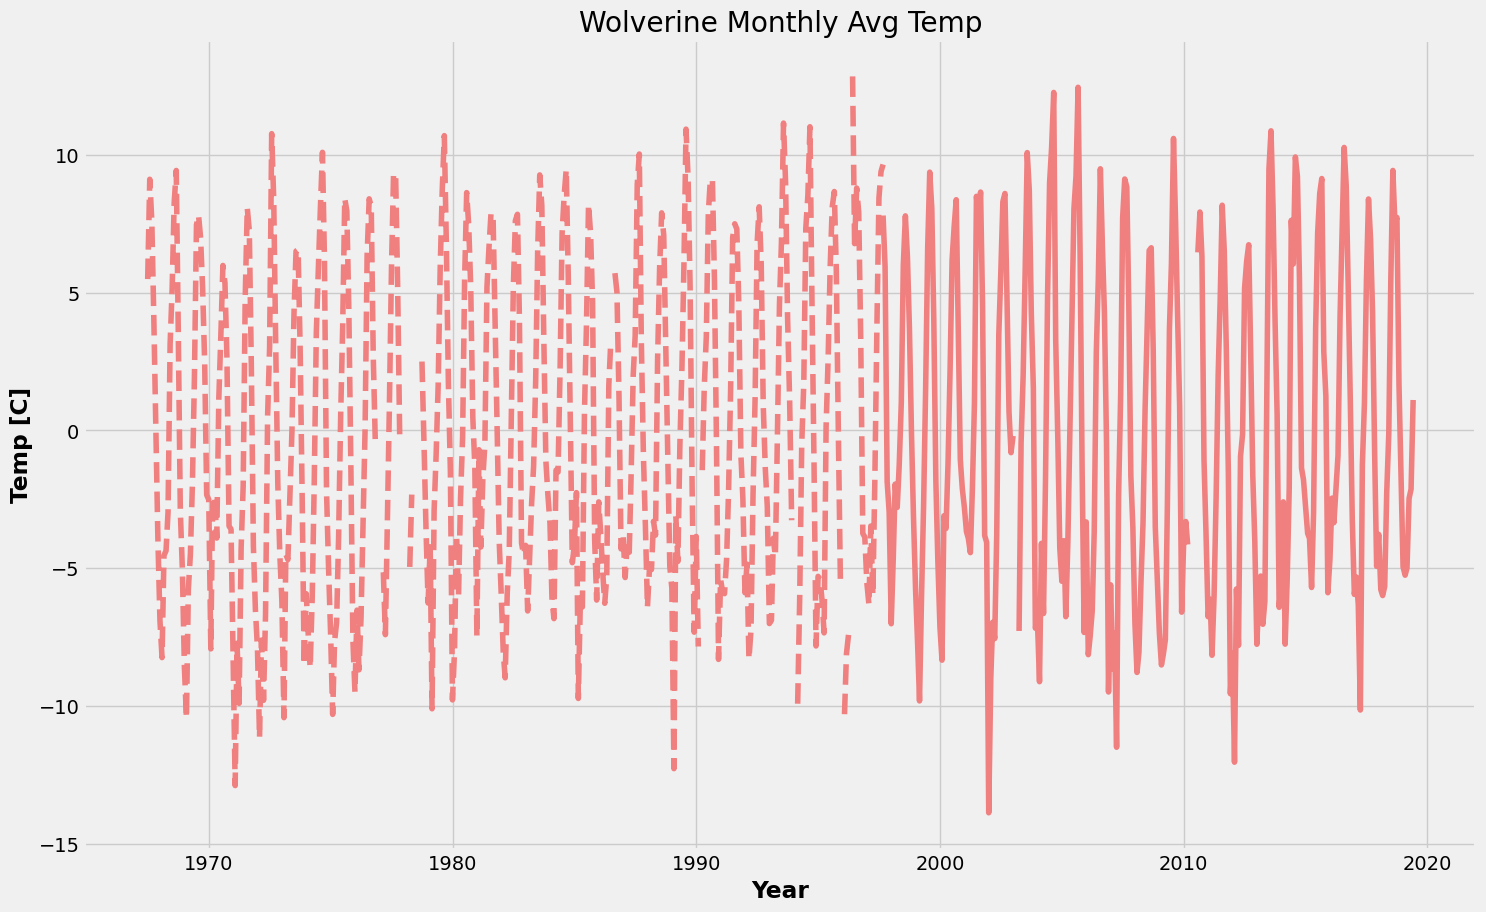

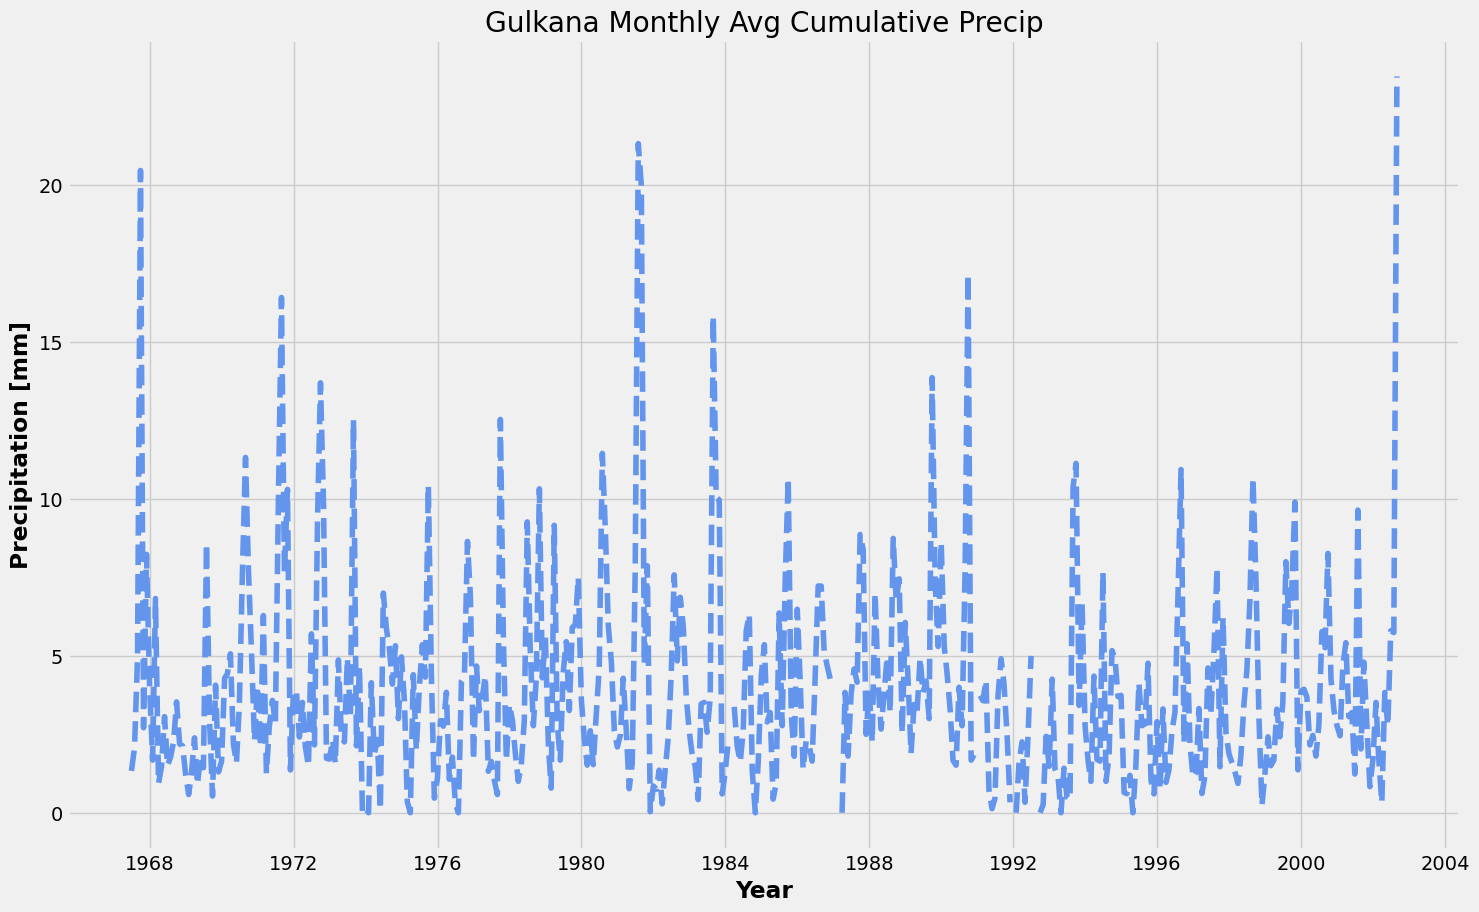

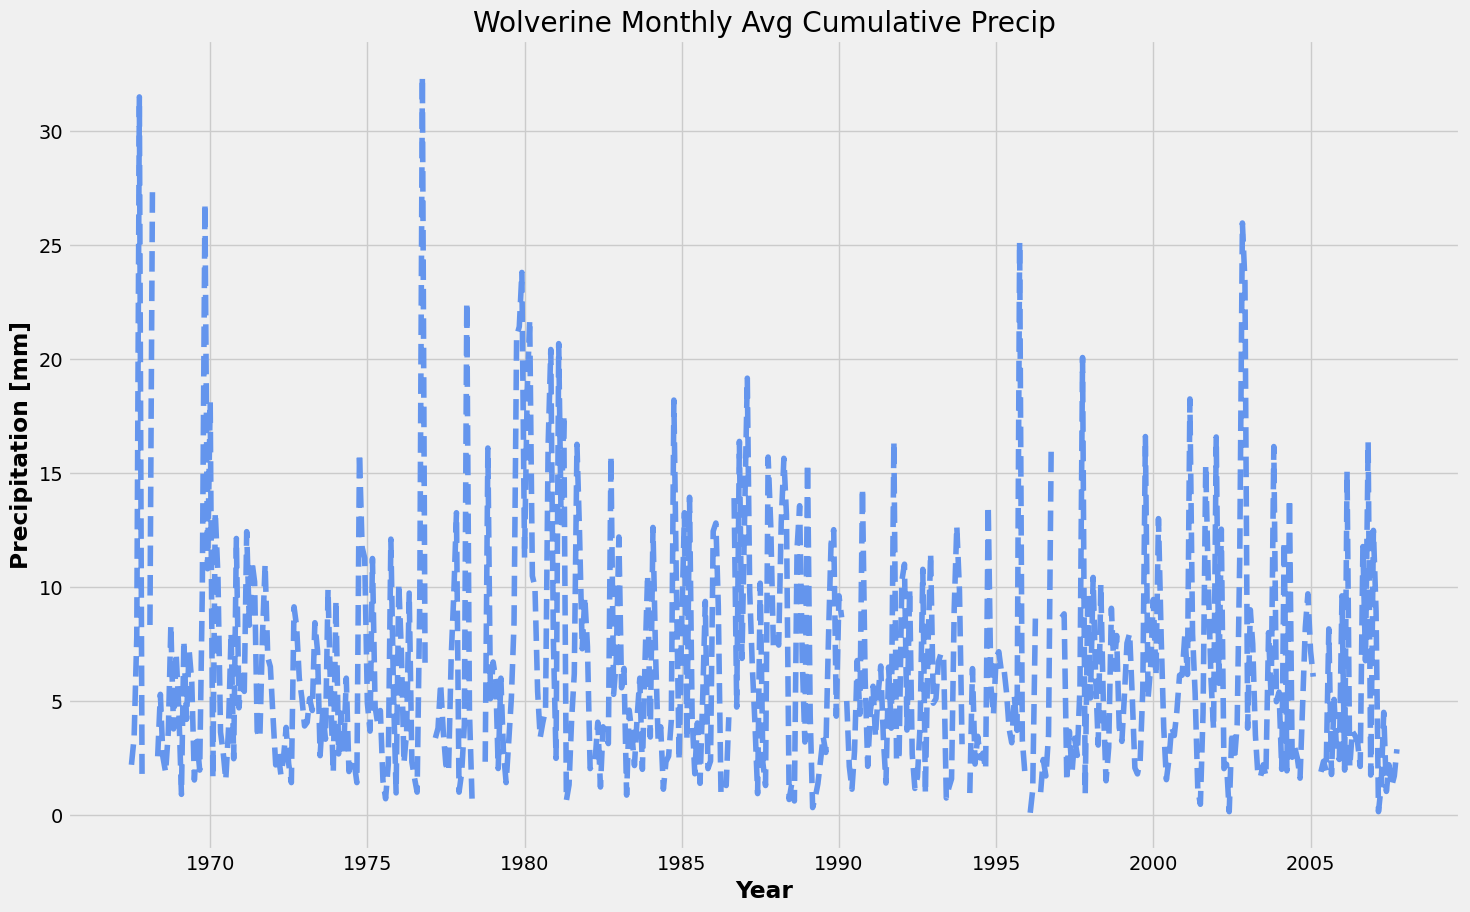

In [4]:
#%% Plots
plt.style.use("fivethirtyeight")

plt.figure(figsize = (16, 10))
plt.plot(Gnew_monthlyT.site_temp_USGS, color = 'lightcoral')
plt.plot(Gold_monthlyT.Temperature, color = 'lightcoral', linestyle = '--')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Temp [C]', fontweight = 'bold')
plt.title('Gulkana Monthly Avg Temp')

plt.figure(figsize = (16, 10))
plt.plot(wolv_monthly.site_temp_USGS, color = 'lightcoral')
plt.plot(wolv_old_monthly.Temperature, color = 'lightcoral', linestyle = '--')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Temp [C]', fontweight = 'bold')
plt.title('Wolverine Monthly Avg Temp')

plt.figure(figsize = (16, 10))
plt.plot(Gold_monthlyT.Precipitation, color = 'cornflowerblue', linestyle = '--')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Precipitation [mm]', fontweight = 'bold')
plt.title('Gulkana Monthly Avg Cumulative Precip')

plt.figure(figsize = (16, 10))
plt.plot(wolv_old_monthly.Precipitation, color = 'cornflowerblue', linestyle = '--')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Precipitation [mm]', fontweight = 'bold')
plt.title('Wolverine Monthly Avg Cumulative Precip')

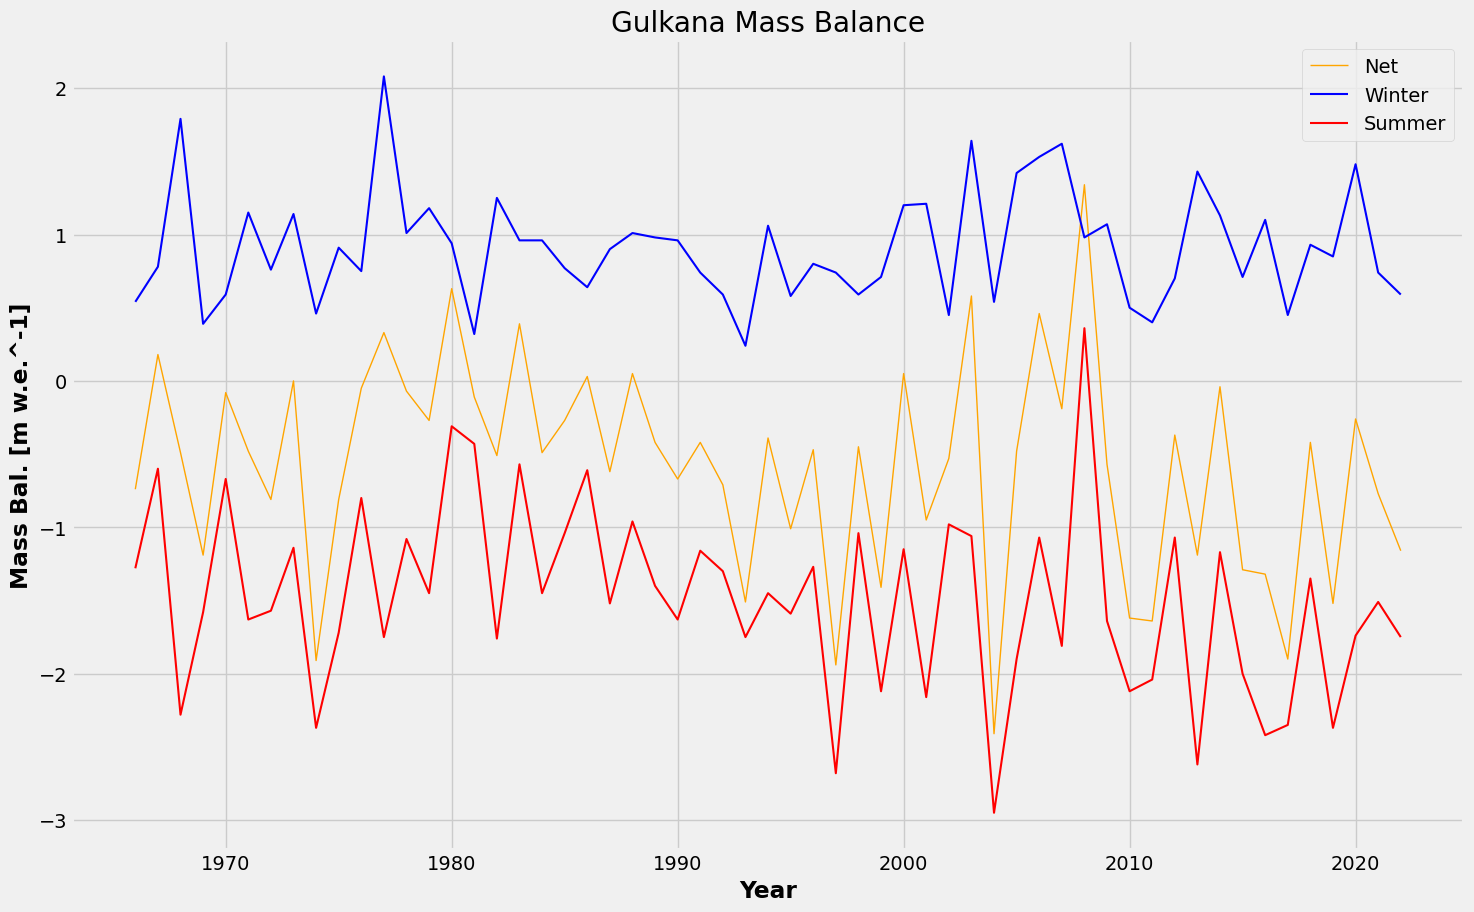

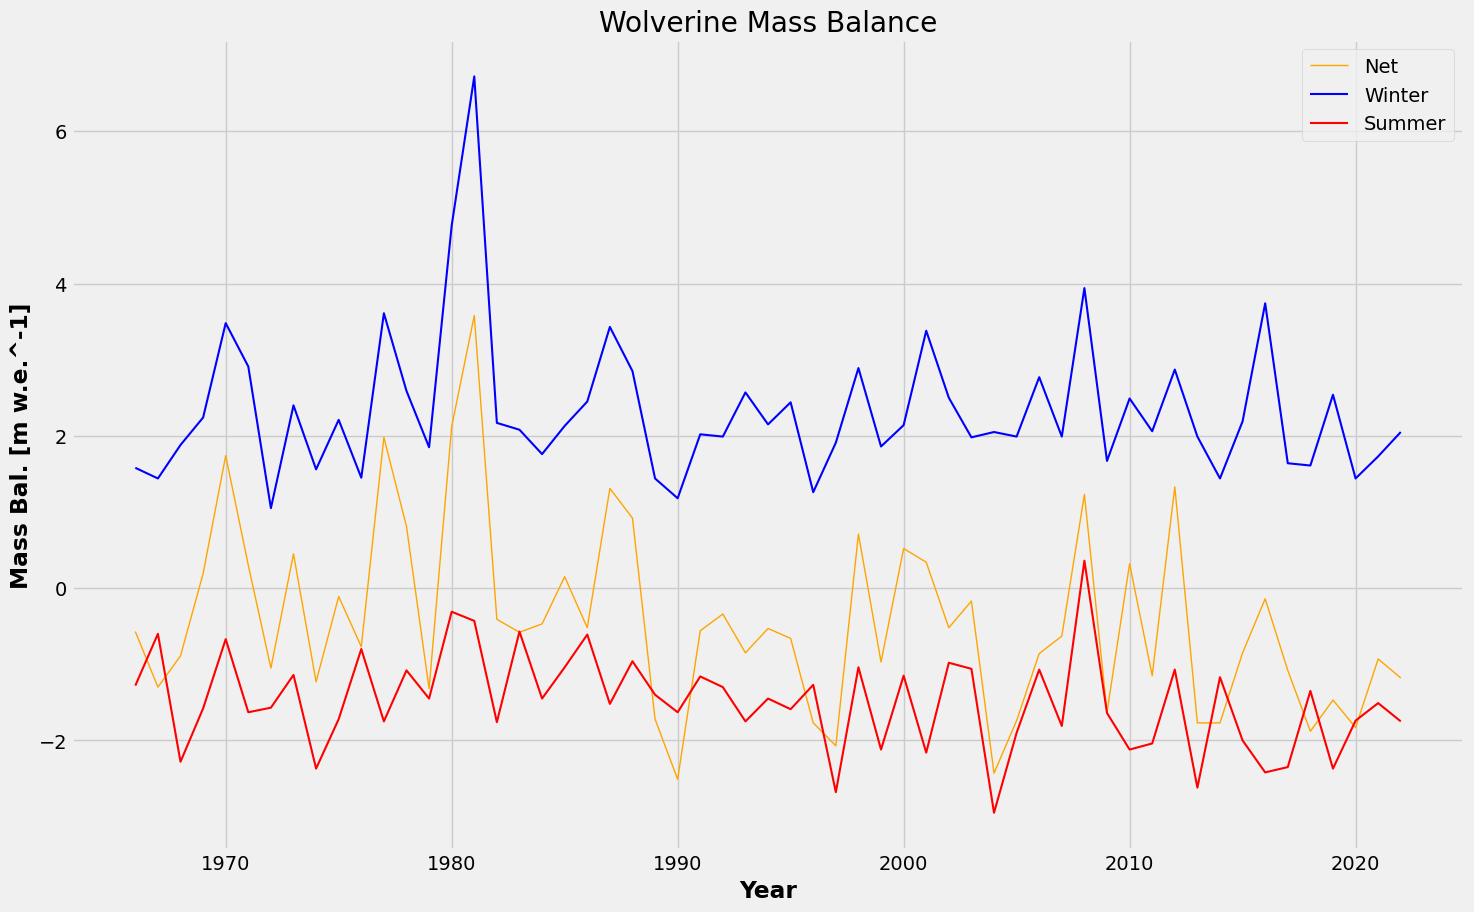

In [5]:
#%%  Mass Balance Timeseries
gulk_mb = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_massBalance/Gulkana/Output_Gulkana_Glacier_Wide_solutions_calibrated.csv')

plt.figure(figsize = (16, 10))
plt.plot(gulk_mb.Year, gulk_mb.Ba, color = 'orange', lw = 1, label = 'Net')
plt.plot(gulk_mb.Year, gulk_mb.Bw, color = 'blue', lw = 1.5, label = 'Winter')
plt.plot(gulk_mb.Year, gulk_mb.Bs, color = 'red', lw = 1.5, label = 'Summer')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Mass Bal. [m w.e.^-1]', fontweight = 'bold')
plt.title('Gulkana Mass Balance')
plt.legend()

wolv_mb = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_massBalance/Wolverine/Output_Wolverine_Glacier_Wide_solutions_calibrated.csv')

plt.figure(figsize = (16, 10))
plt.plot(wolv_mb.Year, wolv_mb.Ba, color = 'orange', lw = 1, label = 'Net')
plt.plot(wolv_mb.Year, wolv_mb.Bw, color = 'blue', lw = 1.5, label = 'Winter')
plt.plot(gulk_mb.Year, gulk_mb.Bs, color = 'red', lw = 1.5, label = 'Summer')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Mass Bal. [m w.e.^-1]', fontweight = 'bold')
plt.title('Wolverine Mass Balance')
plt.legend()



Text(0, 0.5, 'Elevation [m]')

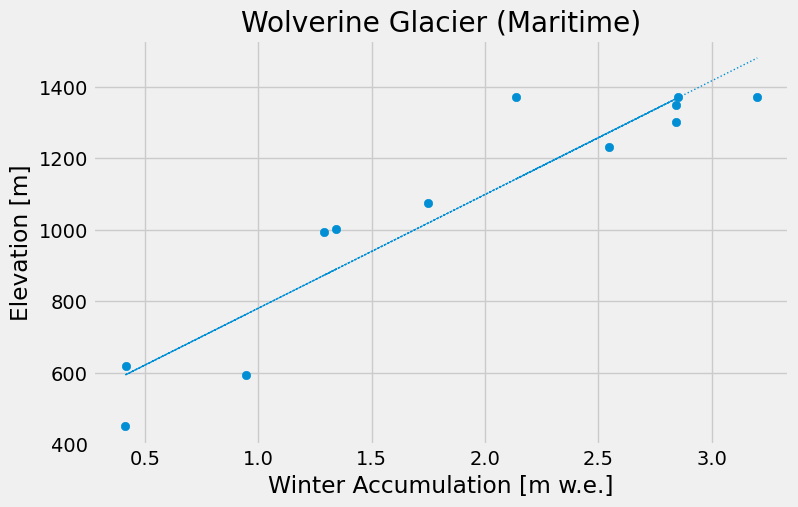

In [6]:
#%% Z profiles of MB
wolv_mb_dist = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_massBalance/Wolverine/Input_Wolverine_Glaciological_Data.csv')
wolv_mb_dist = wolv_mb_dist.drop(columns = ['spring_date', 'fall_date'])

wolv_grouped = wolv_mb_dist.groupby('site_name').mean()

m, b = np.polyfit(wolv_grouped.bw, wolv_grouped.elevation, 1)

plt.figure(figsize = (8, 5))
plt.scatter(wolv_grouped.bw, wolv_grouped.elevation)
plt.plot(wolv_grouped.bw, m*wolv_grouped.bw + b, linestyle = ':', linewidth = '1')
plt.title('Wolverine Glacier (Maritime)')
plt.xlabel('Winter Accumulation [m w.e.]')
plt.ylabel('Elevation [m]')


Text(0, 0.5, 'Elevation [m]')

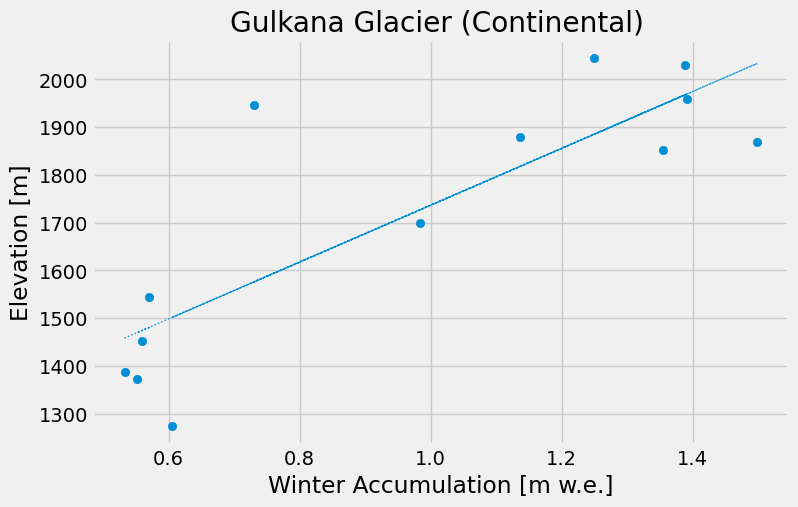

In [7]:
#%% Z profiles of MB
gulk_mb_dist = pd.read_csv('/Users/jonathanmaurer/Documents/PhD/dis_work/General_icepack/benchmarkGlacier_massBalance/Gulkana/Input_Gulkana_Glaciological_Data.csv')
gulk_mb_dist = gulk_mb_dist.drop(columns = ['spring_date', 'fall_date'])

gulk_grouped = gulk_mb_dist.groupby('site_name').mean()

m, b = np.polyfit(gulk_grouped.bw, gulk_grouped.elevation, 1)

plt.figure(figsize = (8, 5))
plt.scatter(gulk_grouped.bw, gulk_grouped.elevation)
plt.plot(gulk_grouped.bw, m*gulk_grouped.bw + b, linestyle = ':', linewidth = '1')
plt.title('Gulkana Glacier (Continental) ')
plt.xlabel('Winter Accumulation [m w.e.]')
plt.ylabel('Elevation [m]')